

# Impact of AirBnB on the Prices of Houses in Dublin between June 2021 and May 2022

- Student Name: Karina Jonina
- Student Code: c00278440
- Module Title: Dissertation
- Module Code: DISSC5201
- Supervisor: Dr Oisin Cawley
- Course Name: Master of Science in Data Science
- Course Code: CW_KCDAR_M
- Assignment Weighting: 100%
- Due Date: 15th August 2022

# Residential Property Price Register

The dataset collected from https://www.propertypriceregister.ie/ has a lot of errors.

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib
import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import re
import geopandas as gpd

# # Will ensure that all rows are displayed
# pd.set_option('display.max_rows', None) 

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
# read the CSV file
ppr = pd.read_csv('data/PPR-ALL.csv', 
                  parse_dates = ['Date of Sale (dd/mm/yyyy)'], 
                  low_memory=False)

# Will ensure that all columns are displayed
pd.set_option('display.max_columns', None) 

In [ ]:
# renaming columns
ppr = ppr.rename(columns={"Date of Sale (dd/mm/yyyy)" : "date",
                         "Address":"address",
                         "County":"county",
                         "Eircode":"eircode",
                         "Price (€)":"price",
                         "Not Full Market Price":"not_full_market_price",
                         "VAT Exclusive":"vat_exclusive",
                         "Description of Property":"description",
                         "Property Size Description":"size_description"})

In [ ]:
ppr.info()

In [ ]:
# checking shape
print("The dataset has {} rows and {} columns.".format(*ppr.shape))

### Month_Year

In [ ]:
# getting month_year in ppr
ppr['month_year'] = pd.to_datetime(ppr['date']).dt.to_period('M')

# change the month_year to string
ppr['month_year'] = ppr['month_year'].astype(str)

In [ ]:
# counting unique address sold in that month_year in Dublin
ppr_count = ppr.groupby(['month_year'])['address'].nunique().to_frame('count').reset_index()
print(ppr_count)

In [ ]:
fig = go.Figure()

# Lineplots of number of houses
fig.add_trace(go.Scatter(
                        x = ppr_count['month_year'],
                        y = ppr_count['count'],
                        mode='lines',
                        name ='ALl of Ireland',
                        hovertemplate="<b>Property Sales</b><br><br>" +
                                        "Date: %{x|%b %Y} <br>" +
                                        "Number of Sales: %{y}<br>" +
                                        "<extra></extra>",
                        #line = dict(color="black")
                        ))
# Add title
fig.update_layout(
        title = 'Number of Properties Sold since 2010',
        title_font_size=30)
# X-Axes
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
                        dict(count = 3, step = "month", stepmode = "backward", label = "3M"),
                        dict(count = 6, step = "month", stepmode = "backward", label = "6M"),
                        dict(count = 1, step = "year", stepmode = "backward", label = "1Y"),
                        dict(count = 2, step = "year", stepmode = "backward", label = "2Y"),
                        dict(count = 3, step = "year", stepmode = "backward", label = "3Y"),
                        dict(count = 5, step = "year", stepmode = "backward", label = "5Y"),
                        dict(count = 7, step = "year", stepmode = "backward", label = "7Y"),
                        dict(count = 1, step = "all", stepmode = "backward", label = "MAX"),
                        dict(count = 1, step = "year", stepmode = "todate", label = "YTD")])))

fig.update_layout(xaxis_rangeslider_visible = False)
fig.update_yaxes(title = 'Number of Properties')

#Show
fig.show()


In [ ]:
# counting unique address sold in that month_year in Dublin
ppr_count = ppr[ppr['date']>='2021/07/01'].groupby(['month_year'])['address'].nunique().to_frame('count').reset_index()
                           
fig = go.Figure()

# Lineplots of number of houses
fig.add_trace(go.Scatter(
                        x = ppr_count['month_year'],
                        y = ppr_count['count'],
                        mode='lines',
                        name ='ALl of Ireland',
                        hovertemplate="<b>Property Sales</b><br><br>" +
                                        "Date: %{x|%b %Y} <br>" +
                                        "Number of Sales: %{y}<br>" +
                                        "<extra></extra>",
                        #line = dict(color="black")
                        ))
# Add title
fig.update_layout(
        title = 'Number of Properties Sold since 2010',
        title_font_size=30)

fig.update_yaxes(title = 'Number of Properties')

#Show
fig.show()


In [ ]:
print(ppr_count)

### Exploring the number of Eircodes post 1st January 2015 

In [ ]:
ppr_post_2015 = ppr[ppr['date']>='2015/05/01'] # the df of Airbnb calendar
ppr_post_2015.head()

In [ ]:
ppr_post_2015['eircode']  = ppr_post_2015['eircode'].fillna('Eircode Unavailable') 

# trying to create the
ppr_post_2015.loc[ppr_post_2015['eircode'].str.contains('Eircode Unavailable'), 'eircode_availability'] = 'Eircode Unavailable'

# Trying to create  
ppr_post_2015.loc[ppr_post_2015['eircode_availability'].isnull(), 'eircode_availability'] = 'Eircode Available'

# ppr_post_2015_eircode.eircode_availability.value_counts(normalize=True)
ppr_post_2015_eircode = ppr_post_2015.groupby(['eircode_availability']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_post_2015_eircode = pd.DataFrame(ppr_post_2015_eircode)
ppr_post_2015_eircode = ppr_post_2015_eircode.reset_index(drop=False)


ppr_post_2015_eircode['% of missing eircodes'] = ppr_post_2015_eircode['count'] / ppr_post_2015_eircode['count'].sum()
ppr_post_2015_eircode 

In [ ]:
# eircode

fig = px.bar(x = ppr_post_2015_eircode['eircode_availability'], 
             y =  ppr_post_2015_eircode["count"])

fig.update_layout(title = "Breakdown of Eircode Availability",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

### Irish Spelling of Words

In [ ]:
for i in ppr['address'][ppr['address'].str.contains('Á')].head(5):
    print(i)

### Address

In [ ]:
# changing address to upper case
ppr['address'] = ppr.loc[:, ('address')].str.upper()

# replacing double spaces with single spaces
ppr['address'] = ppr['address'].str.replace('  ',' ')

In [ ]:
ppr['county'].unique()

In [ ]:
ppr['address'] = ppr['address'].str.replace('.', '')

In [ ]:
# changing county to upper case
ppr['county'] = ppr.loc[:, ('county')].str.upper()

### Cleaning Miscategorised Countries

##### Issues
Some properties have 'Louth' in their value but the county code is 'Meath'. These need to be changed and dropped from the dataset as Louth is not part of the Greater Dublin Area.

In [ ]:
ppr[ppr['address'].str.contains('16 PRESTON MILL, DROGHEDA, LOUTH')]

In [ ]:
ppr[ppr['address'].str.contains('4 BLACKBUSH AVENUE, DROGHEDA, LOUTH')]

In [ ]:
ppr[ppr['address'].str.contains('23 LAGAVOOREN MANOR, DROGHEDA, LOUTH')]

In [ ]:
ppr[ppr['address'].str.contains('33 OAK HILL, GOREY, COUNTY WEXFORD')]

In [ ]:
ppr[ppr['address'].str.contains('CORNARONE, INVERIN, CONNEMARA')]

ppr['county'][ppr['address'].str.contains('CORNARONE, INVERIN, CONNEMARA')] = 'GALWAY'

In [ ]:
ppr[ppr['address'].str.contains('4 SEACLIFF, DUNMORE EAST, CO WATERFORD')]

In [ ]:
ppr[ppr['address'].str.contains('30 STONEYFORD PARK, DELVIN, COUNTY WESTMEATH')]
# these are not necessary duplicates, the house could have been resold... 

#### Country 

In [ ]:
country_list = list(ppr['county'].unique())

In [ ]:
for county in country_list:   
    print(county)

### Exploring Duplicates

In [ ]:
# ... and duplicates
print("This dataset contains {} duplicates of the same address.".format(ppr['address'].duplicated().sum()))

In [ ]:
ppr_month_count = ppr.groupby(['month_year'])['address'].size().to_frame('count').reset_index()

fig = px.line(ppr_month_count, x="month_year", y="count", title='Number of houses')
fig.show()

### Type

In [ ]:
ppr.groupby(['description']).size()

In [ ]:
ppr['description'].unique()

In [ ]:
# replacing text from Irish to English.
ppr['description'] = ppr['description'].str.replace('Teach/Árasán Cónaithe Nua', 'New Dwelling house /Apartment')
ppr['description'] = ppr['description'].str.replace('Teach/Árasán Cónaithe Atháimhe', 'Second-Hand Dwelling house /Apartment')


# ppr['description'][ppr['description'].str.contains('Teach/')]

# replacing 'Teach/?ras?n C?naithe Nua'
ppr['description'][ppr['description'].str.contains('Teach/')] = 'New Dwelling house /Apartment'

In [ ]:
# filling all NaNs with 'Unknown Size'
ppr['description']= ppr['description'].fillna('Unknown Description')

In [ ]:
ppr['description'].unique()

In [ ]:
# DESCRIPTION
ppr_description = ppr.groupby(['description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_description = pd.DataFrame(ppr_description)
ppr_description = ppr_description.reset_index(drop=False)
ppr_description['% of description'] = ppr_description['count'] /ppr_description['count'].sum()
print(ppr_description)
# GRAPH
fig = px.bar(x = ppr_description['description'], 
             y =  ppr_description["count"])

fig.update_layout(title = "Breakdown of Property Description",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

### Size

In [ ]:
ppr['size_description'].unique()

In [ ]:
ppr.groupby(['size_description']).size()

In [ ]:
# filling all NaNs with 'Unknown Size'
ppr['size_description']= ppr['size_description'].fillna('Unknown Size')

In [ ]:
# replacing 'níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach'
ppr['size_description'] = ppr['size_description'].str.replace('níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach', 
                                                              'greater than or equal to 38 sq metres and less than 125 sq metres')

# very similar size so they were combined
ppr['size_description'] = ppr['size_description'].str.replace('greater than 125 sq metres', 
                                                              'greater than or equal to 125 sq metres')


# replacing a 'n?os l? n? 38 m?adar cearnach' with  'less than 38 sq metres'
ppr['size_description'][ppr['size_description'].str.contains('cearnach')] = 'less than 38 sq metres'

In [ ]:
ppr['size_description'].unique()

In [ ]:
# SIZE DESCRIPTION
ppr_size_description = ppr.groupby(['size_description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_size_description = pd.DataFrame(ppr_size_description)
ppr_size_description = ppr_size_description.reset_index(drop=False)
ppr_size_description['% of size_description'] = ppr_size_description['count'] /ppr_description['count'].sum()
print(ppr_size_description)

#GRAPH
ppr_size_description = ppr.groupby(['size_description']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_size_description = pd.DataFrame(ppr_size_description)
ppr_size_description = ppr_size_description.reset_index(drop=False)

fig = px.bar(x = ppr_size_description['size_description'], 
             y =  ppr_size_description["count"])

fig.update_layout(title = "Breakdown of Size Description",
                  yaxis_title = 'Number of Properties Sold', 
                  xaxis_title =  None, 
                  barmode='group')

# fig.update_layout(height = 600, width= 1000)
fig.show()

## Eircode 

In [ ]:
ppr['eircode']  = ppr['eircode'].fillna('EIRCODE UNAVAILABLE') 

In [ ]:
# trying to create the
ppr.loc[ppr['eircode'].str.contains('EIRCODE UNAVAILABLE'), 'eircode_availability'] = 'EIRCODE UNAVAILABLE'

# Trying to create  
ppr.loc[ppr['eircode_availability'].isnull(), 'eircode_availability'] = 'EIRCODE AVAILABLE'

In [ ]:
ppr['eircode'].unique()

In [ ]:
# EIRCODE
ppr_eircode = ppr.groupby(['eircode_availability']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_eircode = pd.DataFrame(ppr_eircode)
ppr_eircode = ppr_eircode.reset_index(drop=False)
ppr_eircode['% of missing eircodes'] = ppr_eircode['count'] /ppr_eircode['count'].sum()
print(ppr_eircode)

# GRAP
fig = px.bar(x = ppr_eircode['eircode_availability'], 
             y =  ppr_eircode["count"])

fig.update_layout(title = "Breakdown of Eircode Availability",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

### Price

In [ ]:
# dropping '€' sign and the commas 
ppr['price']= ppr['price'].str.replace("€","")
ppr['price'] = ppr['price'].str.replace(",","")

# converting to a float
ppr['price'] = ppr['price'].astype('float')


### VAT Exclusive
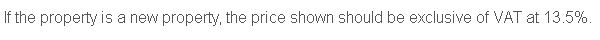

In [ ]:
ppr_vat_exclusive = ppr.groupby(['vat_exclusive']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_vat_exclusive = pd.DataFrame(ppr_vat_exclusive)
ppr_vat_exclusive = ppr_vat_exclusive.reset_index(drop=False)

ppr_vat_exclusive['% of vat_exclusive'] = ppr_vat_exclusive['count'] /ppr_vat_exclusive['count'].sum()
print(ppr_vat_exclusive)

# vat_exclusive
fig = px.bar(x = ppr_vat_exclusive['vat_exclusive'], 
             y =  ppr_vat_exclusive["count"])

fig.update_layout(title = "Breakdown of VAT Exclusive",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

In [ ]:
ppr['price'].describe()

### Not Full Market Price 

In [ ]:
ppr[ppr['not_full_market_price'] == 'Yes']

In [ ]:
ppr_not_full_market_price = ppr.groupby(['not_full_market_price']).size().to_frame('count').sort_values(by= 'count', ascending=False)
ppr_not_full_market_price = pd.DataFrame(ppr_not_full_market_price)
ppr_not_full_market_price = ppr_not_full_market_price.reset_index(drop=False)

ppr_not_full_market_price['% of not_full_market_price'] = ppr_not_full_market_price['count'] /ppr_not_full_market_price['count'].sum()
print(ppr_not_full_market_price)


# not_full_market_price
fig = px.bar(x = ppr_not_full_market_price['not_full_market_price'], 
             y =  ppr_not_full_market_price["count"])

fig.update_layout(title = "Breakdown of Not Full Market Price",
                  yaxis_title = 'Number of Properties', 
                  xaxis_title =  None, 
                  barmode='group')
fig.update_layout(height=600, width=600)
fig.show()

### Cleaning Columns

In [ ]:
# # dropping columns
# ppr = ppr.drop(['not_full_market_price', 'vat_exclusive'], axis=1)
# renaming columns
ppr = ppr.rename(columns={"recalculated_county" : "county"})

### Cleaning Dublin Address

In [ ]:
## Creating a column town
ppr['town'] = ppr['address'].str.split(',').str[-1]

# daft['town'] = daft['town'].str.split(' ').str[1]
town = ppr['town'].sort_values(ascending = True).unique()
for i in town:
    print(i)

#### Incorrect spelling of  County Dublin

In [ ]:
ppr['address'] = ppr['address'].str.replace('Á', 'A')
ppr['address'] = ppr['address'].str.replace('BAILE ATHA CLIATH', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('BHAILE ATHA CLIATH', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace(':UCAN', 'LUCAN')
ppr['address'] = ppr['address'].str.replace('ATH CLIATH', 'DUBLIN') #5
ppr['address'] = ppr['address'].str.replace('ATHA CLIAITH', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('ATHA CLIATH', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('BAILE ATHA BUI', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('B A C', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('B.A.C', 'DUBLIN') #10
ppr['address'] = ppr['address'].str.replace('BAC', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('BAILE ATA CLIATH', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('ATH CLIATH', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('CLONSILLA DUBLIN 5', 'CLONSILLA DUBLIN 15')
ppr['address'] = ppr['address'].str.replace('CO ATHA CLIATH', 'DUBLIN') #15
ppr['address'] = ppr['address'].str.replace('DUBLN', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('DULBIN', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('DUBILN', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('DUBLILN', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('DUBLIN.', 'DUBLIN') #20
ppr['address'] = ppr['address'].str.replace('DUNLIN', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('DUBLINW', 'DUBLIN 6W')
# dealing with misspellings of counties
ppr['address'] = ppr['address'].str.replace('KIILDARE', 'KILDARE')
ppr['address'] = ppr['address'].str.replace('MEAHT', 'MEATH')
ppr['address'] = ppr['address'].str.replace(', COWICKLOW', '')

####  Dublin Locations

In [ ]:
ppr['address'] = ppr['address'].str.replace('IRELAND', '')
ppr['address'] = ppr['address'].str.replace('JAMESS ST', ' JAMES STREET')
ppr['address'] = ppr['address'].str.replace('TALLAGH', 'TALLAGHT')
ppr['address'] = ppr['address'].str.replace('TALLGHT', 'TALLAGHT')
ppr['address'] = ppr['address'].str.replace('TALLAGHTT', 'TALLAGHT')
ppr['address'] = ppr['address'].str.replace('STONYBATTER', 'STONEYBATTER')
ppr['address'] = ppr['address'].str.replace('STILLORGHAN', 'STILLORGAN')
ppr['address'] = ppr['address'].str.replace('SMITHFILED', 'SMITHFIELD ')
ppr['address'] = ppr['address'].str.replace('SHANKHILL', 'SHANKILL ')
ppr['address'] = ppr['address'].str.replace('RATHBOURNE', 'RATHBORNE ')
ppr['address'] = ppr['address'].str.replace('FINGALS', 'FINGLAS ')
ppr['address'] = ppr['address'].str.replace('FOXROXK', 'FOXROCK ')
ppr['address'] = ppr['address'].str.replace('SIR JOHN ROGERSONS QUAY','SIR JOHN ROGERSON\'S QUAY')
ppr['address'] = ppr['address'].str.replace('TYRRELLSTOWN', 'TYRRELSTOWN')
ppr['address'] = ppr['address'].str.replace('VILAGE', 'VILLAGE')
ppr['address'] = ppr['address'].str.replace('ASHTOTWN', 'ASHTOWN')
ppr['address'] = ppr['address'].str.replace('ARTAME', 'ARTANE')
ppr['address'] = ppr['address'].str.replace('BALLINTEER DUNDRUM', 'BALLINTEER')
ppr['address'] = ppr['address'].str.replace('B ALLINTEER', 'BALLINTEER')
ppr['address'] = ppr['address'].str.replace('BRAE', 'BRAY')
ppr['address'] = ppr['address'].str.replace('BALBRGGAN', 'BALBRIGAN')
ppr['address'] = ppr['address'].str.replace('BALBRIGGEN', 'BALBRIGAN')
ppr['address'] = ppr['address'].str.replace('BALBRGGAN', 'BALBRIGAN')
ppr['address'] = ppr['address'].str.replace('BALBRIGGEN', 'BALBRIGAN')
ppr['address'] = ppr['address'].str.replace('BALBROGGAN', 'BALBRIGAN')
ppr['address'] = ppr['address'].str.replace('BALBRIGGIN', 'BALBRIGAN')
ppr['address'] = ppr['address'].str.replace('BALDONELL', 'BALDONNEL')
ppr['address'] = ppr['address'].str.replace('BALDONNELL', 'BALDONNEL')
ppr['address'] = ppr['address'].str.replace('BALGRIFFIIN', 'BALGRIFFIN')
ppr['address'] = ppr['address'].str.replace('BALGRIFFAN', 'BALGRIFFIN')
ppr['address'] = ppr['address'].str.replace('BALGRIFFIIN', 'BALGRIFFIN')
ppr['address'] = ppr['address'].str.replace('BALGRIFFIIN', 'BALGRIFFIN')
ppr['address'] = ppr['address'].str.replace('BALGRIGGAN', 'BALLBRIGGAN')
ppr['address'] = ppr['address'].str.replace('BALGRIGGIN', 'BALLBRIGGAN')
ppr['address'] = ppr['address'].str.replace('BALGRIVVIN', 'BALGRIFFIN')
ppr['address'] = ppr['address'].str.replace('DEANS GRANGE', 'DEANSGRANGE')
ppr['address'] = ppr['address'].str.replace('DONAGHMEDE', 'DONAGHMEADE')
ppr['address'] = ppr['address'].str.replace('DONBATE', 'DONABATE')
ppr['address'] = ppr['address'].str.replace('DUN LAGHAIRE', 'DUN LAOGHAIRE')
ppr['address'] = ppr['address'].str.replace('DUN LAOGHIRE', 'DUN LAOGHAIRE')
ppr['address'] = ppr['address'].str.replace('DUNLAOGHAIRE', 'DUN LAOGHAIRE')
ppr['address'] = ppr['address'].str.replace('DUN LAOIGHAIRE', 'DUN LAOGHAIRE')
ppr['address'] = ppr['address'].str.replace('DUNLAOIRE', 'DUN LAOGHAIRE')
ppr['address'] = ppr['address'].str.replace('ENFILED', 'ENFIELD')
ppr['address'] = ppr['address'].str.replace('HOLLSYTOWN', 'HOLLYSTOWN')
ppr['address'] = ppr['address'].str.replace('I F S C', 'IFSC')
ppr['address'] = ppr['address'].str.replace('KILDANAGAN', 'KILDANGAN')
ppr['address'] = ppr['address'].str.replace('KILLNEY', 'KILLINEY')
ppr['address'] = ppr['address'].str.replace('KINSEAL', 'KINSEALY')
ppr['address'] = ppr['address'].str.replace('KINLEALY', 'KINSEALY')
ppr['address'] = ppr['address'].str.replace('LICAN', 'LUCAN')
ppr['address'] = ppr['address'].str.replace(' AVE,', ' AVENUE,')
ppr['address'] = ppr['address'].str.replace(' RD,', ' ROAD,')
ppr['address'] = ppr['address'].str.replace(' ST,', ' STREET,')
ppr['address'] = ppr['address'].str.replace(' SQ,', ' SQUARE,')
ppr['address'] = ppr['address'].str.replace(' AVE ', ' AVENUE ')
ppr['address'] = ppr['address'].str.replace(' RD ', ' ROAD ')
ppr['address'] = ppr['address'].str.replace(' ST ', ' STREET ')
ppr['address'] = ppr['address'].str.replace(' SQ ', ' SQUARE ')
ppr['address'] = ppr['address'].str.replace(' APT ', ' APARTMENT ')
ppr['address'] = ppr['address'].str.replace('ADADMSTOWN', 'ADAMSTOWN')
ppr['address'] = ppr['address'].str.replace('ADAMANSTOWN', 'ADAMSTOWN')
ppr['address'] = ppr['address'].str.replace('ADAMNSTOWN', 'ADAMSTOWN')
ppr['address'] = ppr['address'].str.replace('ADAMSTON', 'ADAMSTOWN')
ppr['address'] = ppr['address'].str.replace('ADAMSTOW', 'ADAMSTOWN')
ppr['address'] = ppr['address'].str.replace('ADAMSTOWNN', 'ADAMSTOWN')## adds an N to the data so double NN was replaced
ppr['address'] = ppr['address'].str.replace('ASHBOUNE', 'ASHBOURNE')
ppr['address'] = ppr['address'].str.replace('BLAINEROE', 'BLAINROE')
ppr['address'] = ppr['address'].str.replace('BREWREY', 'BREWERY')
ppr['address'] = ppr['address'].str.replace('CARRAGH', 'CARAGH')
ppr['address'] = ppr['address'].str.replace('CELLBRIDGE', 'CELBRIDGE')
ppr['address'] = ppr['address'].str.replace('CITY WEST', 'CITYWEST')
ppr['address'] = ppr['address'].str.replace('CITYWEST WEST', 'CITYWEST')
ppr['address'] = ppr['address'].str.replace('CLONTART', 'CLONTARF')
ppr['address'] = ppr['address'].str.replace('KILDAER', 'KILDARE')
ppr['address'] = ppr['address'].str.replace('CODUBLIN', 'DUBLIN')
ppr['address'] = ppr['address'].str.replace('COKILDARE', 'KILDARE')
ppr['address'] = ppr['address'].str.replace('COLKILDARE', 'KILDARE')
ppr['address'] = ppr['address'].str.replace('COMEATH', 'MEATH')
ppr['address'] = ppr['address'].str.replace('COUNT ', 'COUNTY ')
ppr['address'] = ppr['address'].str.replace('DELGANEY', ' DELGANY')
ppr['address'] = ppr['address'].str.replace('DELGAMY', ' DELGANY')
ppr['address'] = ppr['address'].str.replace('DISTILLARY', ' DISTILLERY')
ppr['address'] = ppr['address'].str.replace('DUBLIN2 4', ' DUBLIN24')
ppr['address'] = ppr['address'].str.replace('DUBLIN5 DUBLIN5', 'DUBLIN5')
ppr['address'] = ppr['address'].str.replace('(PART)', '')
ppr['address'] = ppr['address'].str.replace('DUNSHAUGLIN', 'DUNSHAUGHLIN')
ppr['address'] = ppr['address'].str.replace('KELL', 'KELLS')
ppr['address'] = ppr['address'].str.replace('KELLSS', 'KELLS')
ppr['address'] = ppr['address'].str.replace('KINSEALYY', 'KINSEALY')
ppr['address'] = ppr['address'].str.replace('MIONASTEREVIN', 'MONASTEREVIN')
ppr['address'] = ppr['address'].str.replace('MONASTEREVAN', 'MONASTEREVIN')
ppr['address'] = ppr['address'].str.replace('MONASTERVEIN', 'MONASTEREVIN')
ppr['address'] = ppr['address'].str.replace('NEWTOWN MOUNT KENNEDY', 'NEWTOWNMOUNTKENNEDY')
ppr['address'] = ppr['address'].str.replace('NEWTOWNMOUNTKENEDY', 'NEWTOWNMOUNTKENNEDY')
ppr['address'] = ppr['address'].str.replace('NEWTOWNMTKENNEDY', 'NEWTOWNMOUNTKENNEDY')
ppr['address'] = ppr['address'].str.replace('NICKLOW', 'WICKLOW')
ppr['address'] = ppr['address'].str.replace('PHIBSBORO', 'PHIBSBOROUGH')
ppr['address'] = ppr['address'].str.replace('PHIBSBORO', 'PHIBSBOROUGH')
ppr['address'] = ppr['address'].str.replace('RATHCOOL', 'RATHCOOLE')
ppr['address'] = ppr['address'].str.replace('RATHCOOLEE', 'RATHCOOLE')
ppr['address'] = ppr['address'].str.replace('RATHMICAEL', 'RATHMICHAEL')
ppr['address'] = ppr['address'].str.replace('RATHMULLEN', 'RATHMULLAN')
ppr['address'] = ppr['address'].str.replace('SCHLOARSTOWN', 'SCHOLARSTOWN')
ppr['address'] = ppr['address'].str.replace('STRAFAN', 'STRAFFAN')
ppr['address'] = ppr['address'].str.replace('TALLAGHT DUBLIN4', 'TALLAGHT DUBLIN24')
ppr['address'] = ppr['address'].str.replace('TRIMBLESTON', 'TRIMBLESTOWN')
ppr['address'] = ppr['address'].str.replace('TRIMEBLESTON', 'TRIMBLESTOWN')
ppr['address'] = ppr['address'].str.replace('TYRCONNEL', 'TYRCONNELL')
ppr['address'] = ppr['address'].str.replace('UPR', 'UPPER')
ppr['address'] = ppr['address'].str.replace('WICLOW', 'WICKLOW')
ppr['address'] = ppr['address'].str.replace('DUBLINARDSTOWN', 'BLANCHARDSTOWN')

### Solving Issues with 'address' column 
##### Issue 1

In [ ]:
list(ppr['address'][ppr['address'].str.contains('7 TINAHASK UPPER, ARKLOW')].head(50))

In [ ]:
ppr['address'][ppr['address'].str.contains('7 TINAHASK UPPER, ARKLOW')] = '7 TINAHASK UPPER, ARKLOW'

##### Issue 2

In [ ]:
ppr[ppr['address'].str.contains('26 BIGGER ROAD, WALKINSTOWN, DIZ DUBLIN 12')].head(50)

In [ ]:
ppr['address'][ppr['address'].str.contains('DIZ')] = '26 BIGGER RD, WALKINSTOWN, DUBLIN12'
ppr[ppr['address'].str.contains('26 BIGGER RD, WALKINSTOWN, DUBLIN 12')]

## Dublin Eircode / Postcode

In [ ]:
# extracting 'DUBLIN 1' and 'DUBLIN 11', 'D1' and 'D15'
# IT IS NOT PICKING UP 'DUBLIN 6W' AND 'DUBLIN6W'
ppr["postcode"] = ppr["address"].str.extract(r'(DUBLIN \d+|DUBLIN \d+\W)', 
                                           expand=True)

# examining dublin postcodes
ppr["postcode"].unique()

In [ ]:
ppr['address'] = ppr['address'].str.replace('DUBLIN1', 'DUBLIN 1')
ppr['address'] = ppr['address'].str.replace('DUBLIN2', 'DUBLIN 2')
ppr['address'] = ppr['address'].str.replace('DUBLIN3', 'DUBLIN 3')
ppr['address'] = ppr['address'].str.replace('DUBLIN4', 'DUBLIN 4')
ppr['address'] = ppr['address'].str.replace('DUBLIN5', 'DUBLIN 5')
ppr['address'] = ppr['address'].str.replace('DUBLIN6', 'DUBLIN 6')
ppr['address'] = ppr['address'].str.replace('DUBLIN6W', 'DUBLIN 6W')
ppr['address'] = ppr['address'].str.replace('DUBLIN7', 'DUBLIN 7')
ppr['address'] = ppr['address'].str.replace('DUBLIN8', 'DUBLIN 8')
ppr['address'] = ppr['address'].str.replace('DUBLIN9', 'DUBLIN 9')

ppr['address'] = ppr['address'].str.replace(' D1', ' DUBLIN 1')
ppr['address'] = ppr['address'].str.replace(' D2', ' DUBLIN 2')
ppr['address'] = ppr['address'].str.replace(' D3', ' DUBLIN 3')
ppr['address'] = ppr['address'].str.replace(' D4', ' DUBLIN 4')
ppr['address'] = ppr['address'].str.replace(' D5', ' DUBLIN 5')
ppr['address'] = ppr['address'].str.replace(' D6', ' DUBLIN 6')
ppr['address'] = ppr['address'].str.replace(' D6W', ' DUBLIN 6W')
ppr['address'] = ppr['address'].str.replace(' D7', ' DUBLIN 7')
ppr['address'] = ppr['address'].str.replace(' D8', ' DUBLIN 8')
ppr['address'] = ppr['address'].str.replace(' D9', ' DUBLIN 9')

ppr['address'] = ppr['address'].str.replace(' D 1', ' DUBLIN 1')
ppr['address'] = ppr['address'].str.replace(' D 2', ' DUBLIN 2')
ppr['address'] = ppr['address'].str.replace(' D 3', ' DUBLIN 3')
ppr['address'] = ppr['address'].str.replace(' D 4', ' DUBLIN 4')
ppr['address'] = ppr['address'].str.replace(' D 5', ' DUBLIN 5')
ppr['address'] = ppr['address'].str.replace(' D 6', ' DUBLIN 6')
ppr['address'] = ppr['address'].str.replace(' D 6W', ' DUBLIN 6W')
ppr['address'] = ppr['address'].str.replace(' D 7', ' DUBLIN 7')
ppr['address'] = ppr['address'].str.replace(' D 8', ' DUBLIN 8')
ppr['address'] = ppr['address'].str.replace(' D 9', ' DUBLIN 9')


### Date Selection

In [ ]:
# selecting based on Airbnb date range
ppr = ppr[ppr['date']>='2021/07/01'] # the df of Airbnb calendar
ppr = ppr[ppr['date']<'2022/07/01'] # 

### Greater Dublin Area

In [ ]:
# creating a new variable
ppr.loc[ppr['county'] == 'DUBLIN', 'gda'] = 'GREATER DUBLIN AREA'
ppr.loc[ppr['county'] == 'KILDARE', 'gda'] = 'GREATER DUBLIN AREA'
ppr.loc[ppr['county'] == 'WICKLOW', 'gda'] = 'GREATER DUBLIN AREA'
ppr.loc[ppr['county'] == 'MEATH', 'gda'] = 'GREATER DUBLIN AREA'
ppr.loc[ppr['county'] == 'LOUTH', 'gda'] = 'GREATER DUBLIN AREA'

ppr['gda'] = ppr['gda'].fillna('NOT GREATER DUBLIN AREA')

In [ ]:
ppr = ppr[ppr['gda'] == 'GREATER DUBLIN AREA']

### Total Address
Adding address with county, eircode and 'Ireland' for accuracy during geocoding

In [ ]:
# creating a new column
ppr['total_address'] = ppr['address'] + ', ' + ppr['county'] + ', ' + ppr['eircode'] + ', IRELAND' 
ppr['total_address'] = ppr['total_address'].str.replace('EIRCODE UNAVAILABLE, ','')
ppr['total_address'] =  ppr['total_address'].str.upper()
ppr['total_address']

### Duplicates

In [ ]:
ppr[ppr['total_address'].duplicated()].head(20)

In [ ]:
# ... and duplicates
print("THis dataset contains {} duplicates of the same address.".format(ppr['total_address'].duplicated().sum()))

In [ ]:
ppr[ppr['total_address'].duplicated()].sort_values(by='address', ascending = False).head(50)

In [ ]:
ppr.shape

In [ ]:
ppr = ppr[~(ppr['total_address'].duplicated())]

In [ ]:
# checking for missing data
print('Nan in each columns' , ppr.isna().sum(), sep='\n')
# no missing data

In [ ]:
ppr.shape

### Save clean data

In [ ]:
ppr.to_csv('data/clean_gda_ppr.csv', index=False)